# 1 Sampling and Aliasing

$$
k_{max}<-k_{max}+\frac{N}{P}
$$

$$
k_{max}<\frac{N}{2P}
$$

$$
\frac{2k_{max}}{N}<\frac{1}{P}
$$

$$
2v_{max}<v_{sample}
$$

# 2 Subsampling

Solution: ﬁlter the image, then subsample

In [32]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import importlib
import copy
import sys 
sys.path.append("..")

# reload module in case that module changes
from lib import utils
importlib.reload(utils)
from lib import image_process
importlib.reload(image_process)

<module 'lib.image_process' from '..\\lib\\image_process.py'>

Text(0.5, 1.0, 'Original Image')

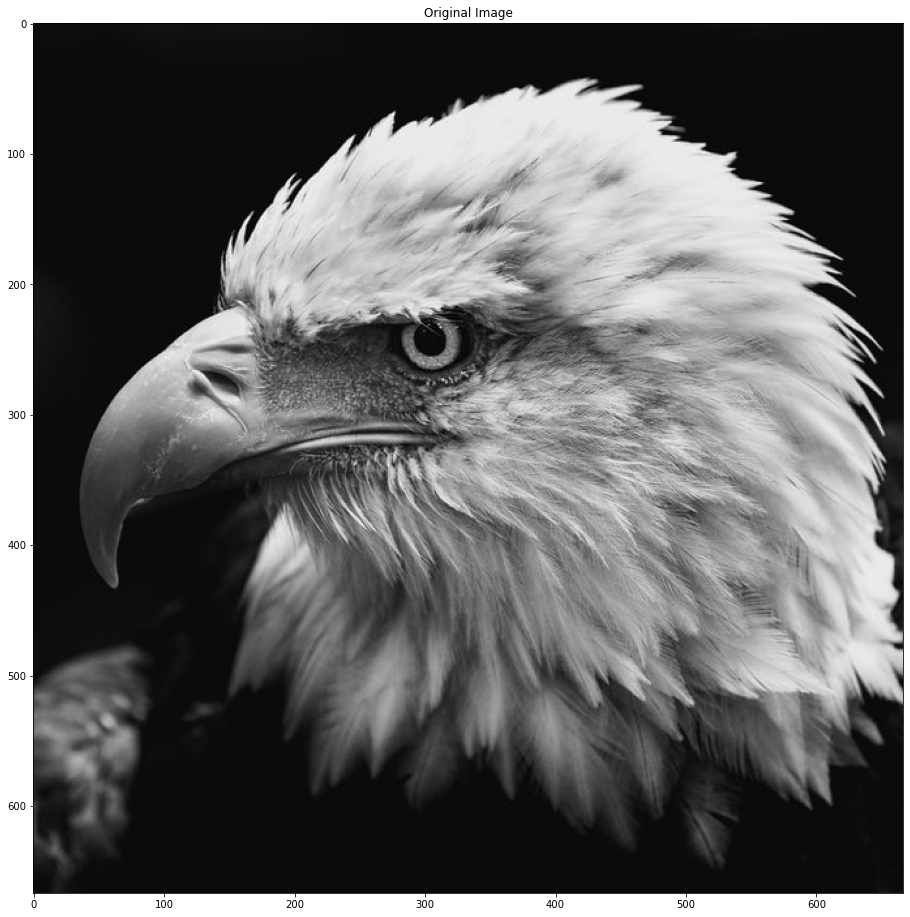

In [36]:
img = cv2.imread('img/example_02.jpg', cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(16,16))
utils.show_img(img)
plt.title('Original Image')

Text(0.5, 1.0, 'subsample factor=2*2 after filtered')

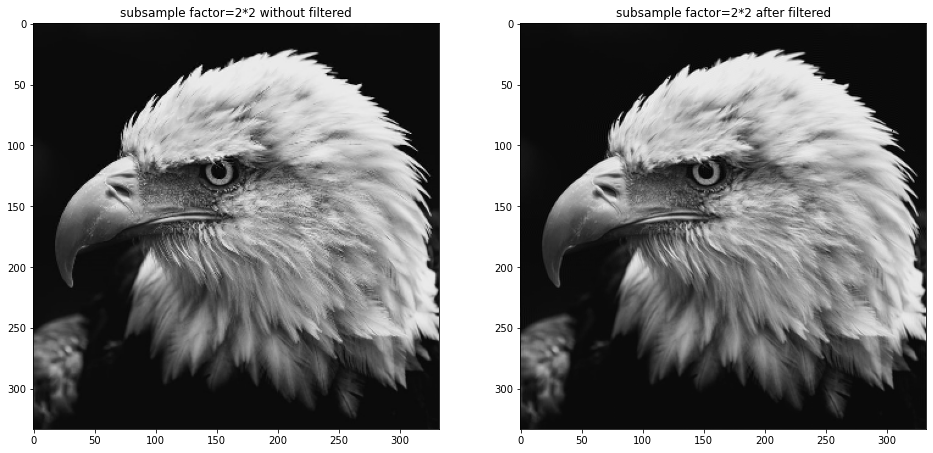

In [43]:
plt.figure(figsize=(16, 32))
plt.subplot(121)
img_sub_2 = image_process.subsample(img, 2, 2)
utils.show_img(img_sub_2)
plt.title('subsample factor=2*2 without filtered')
plt.subplot(122)
img_sub_2_filtered = image_process.subsample_after_filtered(img, 2, 2)
utils.show_img(utils.normalize(img_sub_2_filtered))
plt.title('subsample factor=2*2 after filtered')

Text(0.5, 1.0, 'subsample factor=4*4 after filtered')

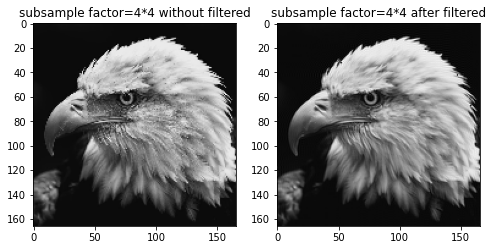

In [47]:
plt.figure(figsize=(8, 16))
plt.subplot(121)
img_sub_4 = image_process.subsample(img_sub_2, 2, 2)
utils.show_img(img_sub_4)
plt.title('subsample factor=4*4 without filtered')
plt.subplot(122)
img_sub_4_filtered = image_process.subsample_after_filtered(img_sub_2_filtered, 2, 2)
utils.show_img(utils.normalize(img_sub_4_filtered))
plt.title('subsample factor=4*4 after filtered')

Text(0.5, 1.0, 'after filtered')

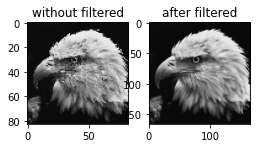

In [48]:
plt.figure(figsize=(4, 8))
plt.subplot(121)
img_sub_8 = image_process.subsample(img_sub_4, 2, 2)
utils.show_img(img_sub_8)
plt.title('without filtered')
plt.subplot(122)
img_sub_8_filtered = image_process.subsample_after_filtered(img_sub_2_filtered, 2, 2)
utils.show_img(utils.normalize(img_sub_8_filtered))
plt.title('after filtered')

# 3 Upsampling (Gaussian Intepolation)

1. upsample the image directly, fill with 0s
2. blur the image (one technique of interpolation)
3. scale up the image

Text(0.5, 1.0, 'upsample factor=2*2 then filtered')

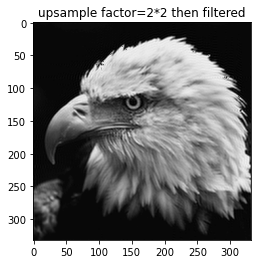

In [58]:
plt.figure(figsize=(4, 4))
img_up_2_filtered = image_process.upsample_then_filtered(img_sub_8_filtered, 2, 2)
utils.show_img(utils.normalize(img_up_2_filtered))
plt.title('upsample factor=2*2 then filtered')

Text(0.5, 1.0, 'upsample factor=4*4 then filtered')

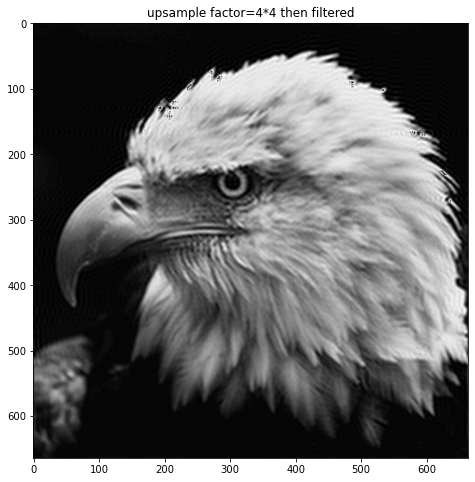

In [59]:
plt.figure(figsize=(8, 8))
img_up_4_filtered = image_process.upsample_then_filtered(img_up_2_filtered, 2, 2)
utils.show_img(utils.normalize(img_up_4_filtered))
plt.title('upsample factor=4*4 then filtered')

Text(0.5, 1.0, 'upsample factor=8*8 then filtered')

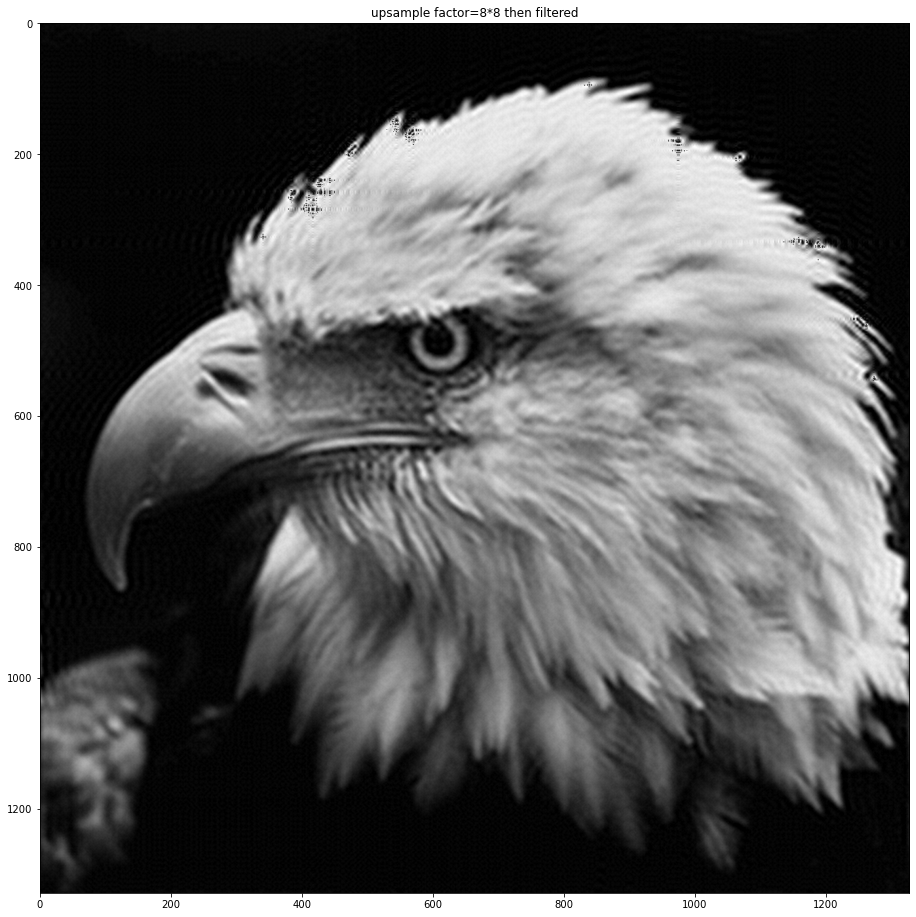

In [60]:
plt.figure(figsize=(16, 16))
img_up_8_filtered = image_process.upsample_then_filtered(img_up_4_filtered, 2, 2)
utils.show_img(utils.normalize(img_up_8_filtered))
plt.title('upsample factor=8*8 then filtered')

# 4 Laplacian Pyramid

Text(0.5, 1.0, 'PyrDown(img)-PyrUp(PyrDown(img)), high frequencies')

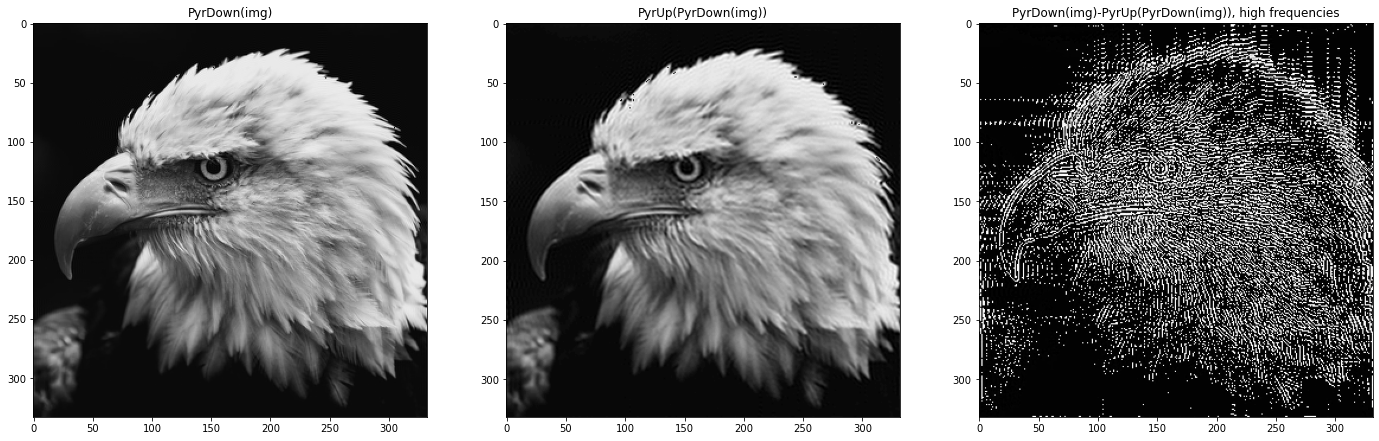

In [76]:
plt.figure(figsize=(24, 24))
plt.subplot(131)
utils.show_img(utils.normalize(img_sub_2_filtered))
plt.title('PyrDown(img)')
plt.subplot(132)
utils.show_img(img_up_2_filtered)
plt.title('PyrUp(PyrDown(img))')
plt.subplot(133)
utils.show_img(img_sub_2_filtered[0:img_up_2_filtered.shape[0],0:img_up_2_filtered.shape[1]]-img_up_2_filtered)
plt.title('PyrDown(img)-PyrUp(PyrDown(img)), high frequencies')

# 5 Intepolation

1. Gaussian Intepolation: set new pixels to be weighted combination of known pixels

$$
g(x,y)=C\sum_{x'}\sum_{y'}\exp\{-\frac{(x-x')^2+(y-y')^2}{2\sigma^2}\}f(x',y')
$$

2. Nearest neighbor interpolation: Find the nearest known pixel and copy its value

3. Bilinear interpolation: Find the 4 nearest neighbours and computed the weighted average of the four